In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
file = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
file.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
file.shape

(7043, 21)

In [104]:
file.drop('customerID',axis='columns',inplace=True)
file.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
file.dtypes
# Total_Charges in is string type 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [106]:
file['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [107]:
file['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [108]:
pd.to_numeric(file.TotalCharges)
# we have some " " which cant be converted to numeric

ValueError: Unable to parse string " " at position 488

In [109]:
# Replace " " with NaN and get its index
pd.to_numeric(file.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [110]:
# to know where NaN exist
file[pd.to_numeric(file.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [111]:
# drop 11 columns
df1 = file[file.TotalCharges!=' ']
df1.shape

(7032, 20)

In [1]:
# we have dropped " " so know lets convert it
# df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges)

In [113]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

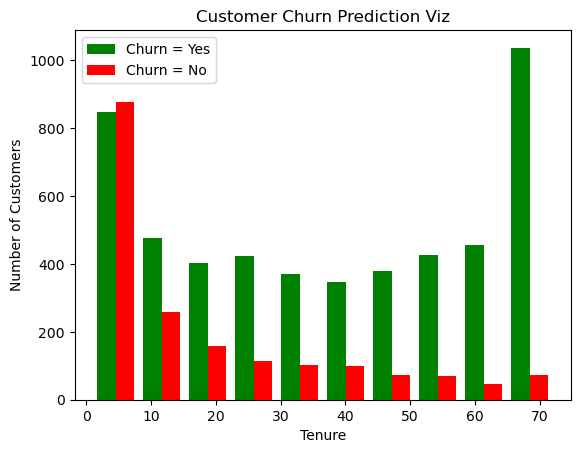

In [114]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Viz')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn = Yes','Churn = No'])
plt.legend()
plt.show

Conclusion :- People with more Tenure are not leaving but are loyal

<function matplotlib.pyplot.show(close=None, block=None)>

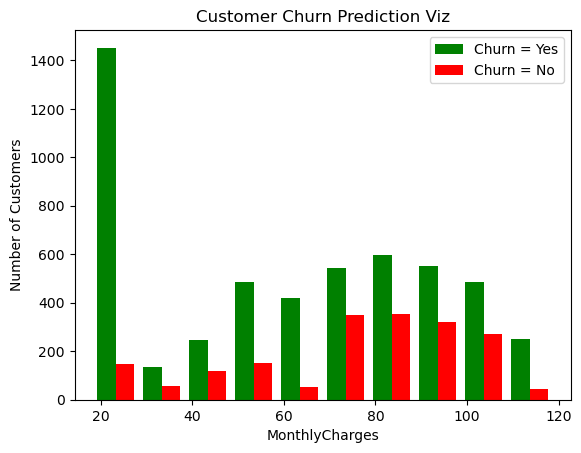

In [115]:
tenure_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Viz')

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn = Yes','Churn = No'])
plt.legend()
plt.show

In [116]:
def print_unique_col_values(df):
  for column in df:
     if df[column].dtypes == 'object':
         print(f'{column}:{df[column].unique()}')
    

In [117]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [118]:
# There are many entries with No Phone service or No internet service so we need to replace that with 'No'
df1 = df1.replace('No internet service','No')
df1 = df1.replace('No phone service','No')

In [119]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Convert all Yes to 1 and No to 0 ( Label Encoding )

In [120]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns :
    df1[col].replace({'Yes':1,'No':0},inplace = True)

In [95]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [121]:
df1['gender'].replace({'Female':1,'Male':0},inplace = True )
df1['gender'].unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64>

In [122]:
print_unique_col_values(df1)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [127]:
# More than one category, so use one hot encoding
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [130]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [133]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [135]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [137]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5861,0,0,0,0,0.478873,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3797,0,0,1,0,0.591549,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
6351,0,0,1,1,0.690141,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1066,0,0,1,0,0.647887,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5578,1,0,1,1,0.577465,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


#### Data Preprocessing ended

In [138]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2003)

In [143]:
x_train.shape

(5625, 26)

In [142]:
len(x_train.columns)

26

In [153]:
batch_size = 128

In [150]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train, epochs = 100)




Epoch 1/100


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.5542
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7795 - loss: 0.4443
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4239
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7989 - loss: 0.4137
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7897 - loss: 0.4230
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4168
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7925 - loss: 0.4315
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7978 - loss: 0.4242
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8089 - loss: 0.4120
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8064 - loss: 0.4143
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4036
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [154]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7867 - loss: 0.4281  


[0.4250642657279968, 0.7981520891189575]

In [164]:
yp = model.predict(x_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


array([[0.53536576],
       [0.00305003],
       [0.0116963 ],
       [0.00564435],
       [0.00335752]], dtype=float32)

In [165]:
y_test[:5]

4143    1
330     0
6742    0
3714    0
1055    0
Name: Churn, dtype: int64

In [166]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [167]:
y_pred[:5]

[1, 0, 0, 0, 0]

In [168]:
y_test[:5]

4143    1
330     0
6742    0
3714    0
1055    0
Name: Churn, dtype: int64

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1023
           1       0.66      0.53      0.59       384

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [172]:
confusion_matrix(y_test,y_pred)

array([[919, 104],
       [180, 204]], dtype=int64)